Find this project in [Github: UberHowley/SPOC-File-Processing](https://github.com/UberHowley/spoc-file-processing)

---

# Python Processing of SPOC Logfiles
In previous work [detailed here](http://www.irishowley.com/website/pMOOChelpers.html) I found that up- and down-voting had a significant negative effect on the number of peer helpers MOOC students invited to their help seeking thread. Results from a previous survey experiment also suggested that framing tasks with a learning-oriented (or value-emphasized) instruction decreased evaluation anxiety, which is the hypothesized mechanism through which voting inhibits help seeking. Following on this work, I wished to investigate **how voting impacts help seeking in more traditional online course discussion forums** and **if we can alleviate any potential costs of effective participation while still maintaining the benefits of voting in forums**? 

So this experiment took place in a Small Private Online Course (SPOC) with a more naturalistic up/downvoting setup in a disucssion forum and used prompts that emphasized the value of participating in forums.

*I used Python to clean the logfile data, gensim to assign automated [LDA] topics to each message board post, and pandas to perform statistical analyses in order to answer my research questions.*

## Research Questions
Our QuickHelper system was designed to advise students on which peers they might want to help them, but also to answer  theory-based questions about student motivation and decision-making in the face of common interactional archetypes employed in MOOCs. This yielded the following research questions:
1. What is the effect of no/up/downvoting on {learning, posting comments, posting quality comments, help seeking}
1. What is the effect of neutral/goal prompting on {learning, posting comments, posting quality comments, help seeking}
1. Is there an interaction between votingXprompting on {learning, posting comments, posting quality comments, help seeking}
1. What is the relationship between {posting, posting quality, help seeking} and learning?
1. Which prompts are the most successful at getting a student response? (Does this change over time?) What about the highest quality responses?
1. What behavior features correlate strongly with learning or exam scores? (i.e., can we predict student performance with behaviors in the first couple of weeks?)
  1. Is there a correlation between pageviews and performance?
  1. What is the most viewed lecture? etc.
  1. What lecture is viewed the most by non-students? etc.

## Experimental Setup
The parallel computing course in which this experiment took place met in-person twice per week for 1:20, but all lecture slides (of which there were 28 sets) were posted [online](http://15418.courses.cs.cmu.edu/spring2015/). Each slide had its own discussion forum-like comments beneath it, as shown below. Students enrolled in the course were required to "individually contribute one interesting comment per lecture using the course web site" for a 5% participation grade. The experiment began in the TODO week of the course, and ran for TODO weeks.
![SPOC Discussion Forum](http://www.irishowley.com/website/images/proj_spoc_forum.jpg)

Approximately 70 consenting students are included in this 3X2 experiment.

### Voting
There were three voting conditions in this dimension: no voting, upvoting only, and downvoting, as shown below. Each student was assigned to one of these conditions, and they only ever saw one voting condition. There was the issue of cross-contamination of voting conditions, if one student looked at a peer's screen, but the instructors did not see any physical evidence of this cross contamination until the last week of the course.
![SPOC Voting Conditions](http://www.irishowley.com/website/images/proj_spoc_voting.jpg)

### Prompting
Students were also assigned to only one of two prompting conditions: positive (learning-oriented/value-emphasis) or neutral. These prompts were in the form of an email sent through the system, that would have a preset "welcome prompt" followed by a customizable "instructional prompt." The welcome prompt was either value-emphasis or neutral in tone, and the instructional prompt was either a general 'restate' request or a more specific in nature, prompting the student to answer a specific question. The welcome prompts were predefined and not customizable by the sender of the prompts, while the instructional portion was customizable.  In order to maintain the utility of the email prompots, instructor-customization had to be supported.

<table><tr><td><b>Neutral Welcome Prompt</b></td><td><b>Positive Welcome Prompt</b></td></tr>
<tr><td><ul><li>This is a discussion you can participate in.</li>
<li>Here is a discussion you can participate in.</li>
<li>This is a thread you can participate in.</li>
<li>Here’s a thread you can comment on.</li>
<li>Here’s a conversation you can comment on.</li>
<li>Here’s a conversation you can participate in.</li>
<li>Here is a discussion in which you can participate.</li>
<li>This is an opportunity to engage in the class discussion.</li>
<li>Here is an opportunity for you to engage in the class discussion.</li>
<li>Here’s a chance to engage in the discussion.</li>
<li>Here’s a chance to jump into the discussion.</li>
<li>Here’s an opportunity to jump in.</li>
<li>This is a thread you can respond to.</li>
<li>Here is a discussion you can respond to.</li>
<li>Here’s a conversation to jump in on.</li>
<li>Here’s a conversation you can respond to.</li></ul>
</td><td><ul><li>Participating in class discussions increases exposure to new ideas.</li>
<li>Our class discussion forums increase exposure to new ideas.</li>
<li>Exposure to new ideas is one benefit to the class discussion forums.</li>
<li>Take some time to explore some new ideas in the class forums.</li>
<li>Writing down your thoughts will help you think through complex ideas.</li>
<li>Class discussions help you understand concepts, not just memorize them.</li>
<li>Participating in class discussions will help you understand the concepts, and not just memorize them.</li>
<li>Contributing to the course discussion forums is a good way to learn new things.</li>
<li>Participation in course discussions will increase your learning.</li>
<li>Expanding on others’ ideas is a great way to learn new things.</li>
<li>Participating in the class discussions online will help you learn the concepts better.</li>
<li>Asynchronous discussions allow for more thought-processing time.</li>
<li>Class discussion forums get you to think through your thoughts.</li>
<li>Participation from all students is key to everyone’s learning.</li>
<li>Expanding on others’ ideas is a great way to check your own understanding.</li>
<li>Writing things down is a great way to check your own understanding.</li></ul>
</td></tr></table>

<table><tr><td><b>Context - Restate (customizable)</b></td><td><b>Context - Question (customizable)</b></td></tr>
<li><tr><td><ul><li>Try to describe what was said on this slide in your own words.</li>
<li>Summarize the main point of this slide.</li>
<li>Summarize the topic of [Insert concept related to slide here].</li>
<li>Summarize, in your own words, what @NAME was trying to say here.</li>
<li>Restate, in your own words, what I was trying to explain on this slide.</li>
<li>Restate, in your own words, the idea of [Insert concept related to slide here].</li>
<li>Restate, in your own words, what @NAME was trying to say here.</li>
<li>Try restating, in your own words, what @NAME was saying here.</li>
<li>Try and describe the main idea in this slide.</li>
<li>Can you summarize the discussion happening here?</li></ul>
</td><td><ul><li>Can you answer the question in this discussion?</li>
<li>Try to answer the question in this discussion.</li>
<li>What’s your answer to this question?</li>
<li>How would you answer this question?</li></ul>
</td></tr></table>

A course instructor might decide to prompt some students to answer another students' question, as this is a valuable learning activity. When a course instructor decides to send an email prompt to a student, the system would randomly select two students. The instructor would select and customize the instructional prompt and upon submitting, the system would send an email to two students, with an appropriate version of a randomly selected welcome prompt. An example email prompt is shown below:
![SPOC Email Prompt Example](http://www.irishowley.com/website/images/proj_spoc_prompting.jpg)


## Processing Logfiles
Processing the logfiles mostly involves: (1) ensuring that only consenting students are included in the dataset, (2) that each comment is assigned an LDA topic, (3) that student names are removed from the dataset, (4) removing course instructors from the dataset, and (5) removing spaces from column headers.

## Statistical Analysis
I used the pandas and statsmodels libraries to run descriptive statistics, generate plots to better understand the data, and answer our research questions (from above). The main effects of interest were the categorical condition variables, `voting` (updownvote, upvote, novote) & `prompts` (positive, neutral) and a variety of scalar dependent variables (`number of comments`, `comment quality`, `help seeking`, and `learning`).

In [6]:
# necessary libraries/setup
%matplotlib inline
import utilsSPOC as utils  # separate file that contains all the constants we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # importing seaborns for its factorplot
sns.set_style("darkgrid")

data = pd.io.parsers.read_csv("150512_spoc_full_data_mod.csv", encoding="utf-8-sig")
conditions = [utils.COL_VOTING, utils.COL_PROMPTS]  # all our categorical IVs of interest
covariate = utils.COL_NUM_PROMPTS  # number of prompts received needs to be controlled for
outcome = utils.COL_NUM_COMMENTS

### Descriptive Statistics
Descriptive statistics showed that the mean number of comments students posted was 19 and the median was 17.

In [7]:
# Min & Max numHelpers should be 0-3
df = data[[outcome]]
df.describe()

,NumComments
count,68.000000
mean,19.029412
std,16.363383
min,0.000000
25%,5.750000
50%,17.000000
75%,26.250000
max,77.000000


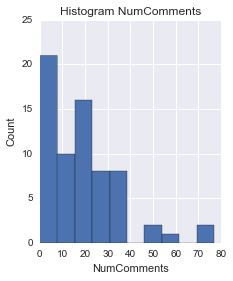

In [8]:
# histogram of num comments
fig = plt.figure()
ax2 = fig.add_subplot(122)
helpers_hist = data[outcome]
ax2 = helpers_hist.plot(kind='hist', title="Histogram "+outcome, by=outcome)
ax2.locator_params(axis='x')
ax2.set_xlabel(outcome)
ax2.set_ylabel("Count")

fig.tight_layout()

When looking at the independent variables, we see a even random assignment to `Condition`, but not to `EncouragementType`, although it's not terribly far off.

In [9]:
df = data[conditions+[outcome]]
for cond in conditions:
    print(pd.concat([df.groupby(cond)[cond].count(), df.groupby(cond)[outcome].mean()], axis=1))

                  Condition  NumComments
Condition                               
NOVOTE_GROUP             23    18.869565
UPDOWNVOTE_GROUP         25    19.320000
UPVOTE_GROUP             20    18.850000
                   EncouragementType  NumComments
EncouragementType                                
NEUTRAL                           41    17.317073
POSITIVE                          27    21.629630


### Answering Our Research Questions
The research questions require a bit of statistics to answer. In the case of a single factor with two levels we use a t-test to determine if the independent variable in question has a significant effect on the outcome variable. In the case of a single factor with more than two levels, we use a one-way Analysis of Variance (ANOVA). With more than one factor we use a two-way ANOVA. These are all essentially similar linear models (ordinary least squares), with slightly different equations or statistics for determining significance. 

#### What is the effect of no/up/downvoting on {learning, posting comments, posting quality comments, help seeking}
*(VotingCondition --> numComments)*

To answer this question, we run a one-way ANOVA (since there are more than 2 levels to this one factor). Since the p-value is above 0.05 (i.e., 0.973538) we must accept the null hypothesis that there is no difference between voting conditions on number of posted comments.

              df        sum_sq     mean_sq         F    PR(>F)
C(Condition)   2      3.342481    1.671240  0.006056  0.993962
Residual      65  17936.598696  275.947672       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:            NumComments   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                  0.006056
Date:                Sun, 17 May 2015   Prob (F-statistic):              0.994
Time:                        16:20:42   Log-Likelihood:                -286.04
No. Observations:                  68   AIC:                             578.1
Df Residuals:                      65   BIC:                             584.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     

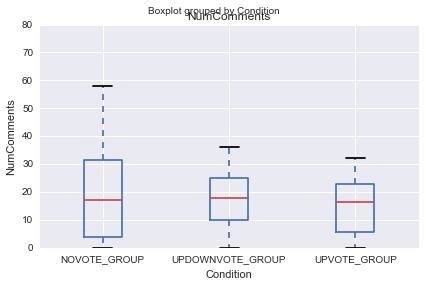

In [10]:
# need a few more libraries for ANOVA analysis
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

cond = utils.COL_VOTING
df = data[[cond, outcome]].dropna()

cond_lm = ols(outcome + " ~ C(" + cond + ")", data=df).fit()
anova_table = anova_lm(cond_lm)
print(anova_table)
print(cond_lm.summary())

# boxplot 
fig = plt.figure()
ax = fig.add_subplot(111)
ax = df.boxplot(outcome, cond, ax=plt.gca())
ax.set_xlabel(cond)
ax.set_ylabel(outcome)
fig.tight_layout()

#### Does showing expertise information about potential helpers increase the number of helpers the student invites to her question thread? 
*(EncouragementType --> numComments)*

We run a t-test (since there are only two levels of one factor) and see that the p-value is once again not significant (i.e., 0.29).

In [11]:
from statsmodels.stats.weightstats import ttest_ind
cond = utils.COL_PROMPTS
df = data[[cond, outcome]].dropna()

cat1 = df[df[cond] == 'NEUTRAL'][outcome]
cat2 = df[df[cond] == 'POSITIVE'][outcome]

tstat, pval, degf = ttest_ind(cat1, cat2)  # returns t-stat, p-value, and degrees of freedom
print("t-stat: ", tstat, ", p-value: ", pval, ", df: ", degf)  

# boxplot
if (pval <= 0.1):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = df.boxplot(outcome, cond, ax=plt.gca())
    ax.set_xlabel(cond)
    ax.set_ylabel(outcome)
    fig.tight_layout()

t-stat:  -1.06441653318 , p-value:  0.291018839024 , df:  66.0


#### Is there an interaction between voting X prompting on {learning, posting comments, posting quality comments, help seeking}
*Condition X EncouragementType --> numComments*

The OLS output is not significant (p = 0.810).

In [13]:
col_names = [utils.COL_VOTING, utils.COL_PROMPTS, utils.COL_NUM_COMMENTS]
factor_groups = data[col_names].dropna()

formula = col_names[2] + " ~ C(" + col_names[0] + ") + C(" + col_names[1] + ")"
formula_interaction = formula.replace('+', '*')

print("= = = = = = = = " + formula + " = = = = = = = =")
lm = ols(formula, data=factor_groups).fit()  # linear model: AIC 578.9
print(lm.summary())

print("\n= = = = = = = = " + formula_interaction + " = = = = = = = =")
lm_interaction = ols(formula_interaction, data=factor_groups).fit()  # interaction linear model: AIC 597.5
print(lm_interaction.summary())

# First linear model has lower AIC than the interaction linear model, although neither are sigificant.

= = = = = = = = NumComments ~ C(Condition) + C(EncouragementType) = = = = = = = =
                            OLS Regression Results                            
Dep. Variable:            NumComments   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.3771
Date:                Sun, 17 May 2015   Prob (F-statistic):              0.770
Time:                        16:21:44   Log-Likelihood:                -285.45
No. Observations:                  68   AIC:                             578.9
Df Residuals:                      64   BIC:                             587.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------

In [ ]:
# These are ANOVA tests for determining if different models are significantly different from each other.
# Although we know from the previous step that none of these are signficant, so these tests aren't necessary.
# In some cases, you could look at the AIC value from the OLS output, and pick the model with a lower AIC.
# The ANOVA output provides the F-statistics which are necessary for reporting results.
# From: http://statsmodels.sourceforge.net/devel/examples/generated/example_interactions.html

# Tests whether the additive linear model is significantly different from the multiplicative (interaction) lin model
print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = =")
print("= = " + formula + " ANOVA = = ")
print("= = vs. " + formula_interaction + " = =")
print(anova_lm(lm, lm_interaction))

# Tests whether the LM of just Condition is significantly different from the additive LM
print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = =")
f_just_first = col_names[2] + " ~ C(" + col_names[0] + ")"
print("= = " + f_just_first + " ANOVA = = ")
print("= = vs. " + formula + " = =")
print(anova_lm(ols(f_just_first, data=factor_groups).fit(), ols(formula, data=factor_groups).fit()))

# Testing whether the LM of just EncouragementType is significantly different from the additive LM
print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = =")
f_just_second = col_names[2] + " ~ C(" + col_names[1] + ")"
print("= = " + f_just_second + " = = ")
print("= = vs. " + formula + " = =")
print(anova_lm(ols(f_just_second, data=factor_groups).fit(), ols(formula, data=factor_groups).fit()))

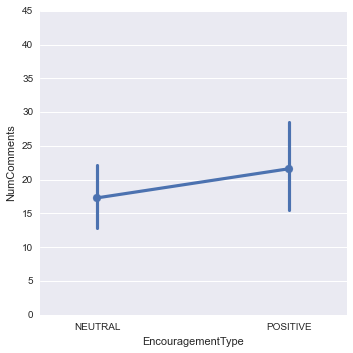

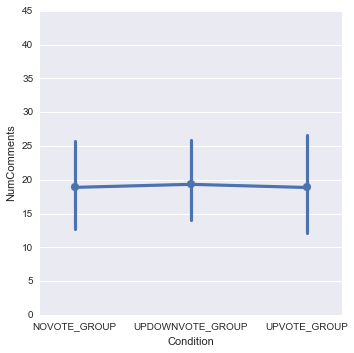

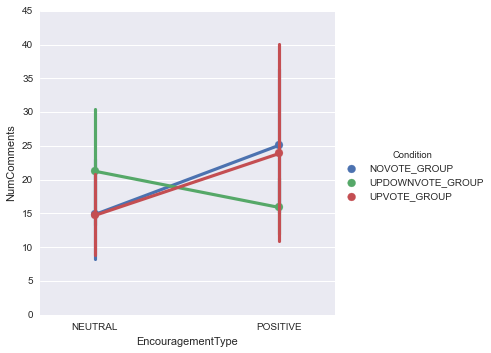

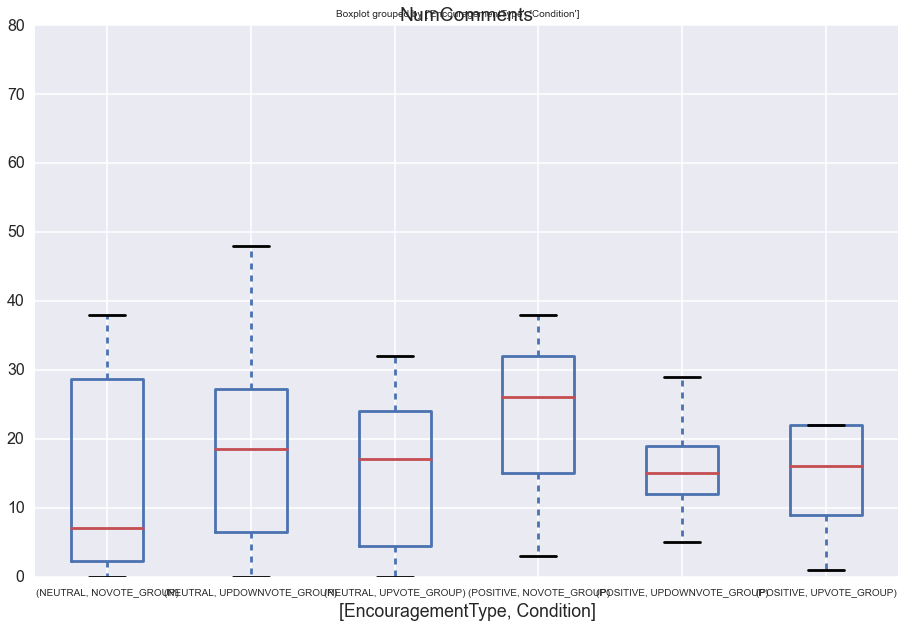

In [21]:
# plotting
from statsmodels.graphics.api import interaction_plot
sns.set_context("notebook")

fig = plt.figure()
ax1 = sns.factorplot(x=col_names[1], y=col_names[2], data=factor_groups, kind='point', ci=95)
ax1.set(ylim=(0, 45))
ax2 = sns.factorplot(x=col_names[0], y=col_names[2], data=factor_groups, kind='point', ci=95)
ax2.set(ylim=(0, 45))
ax3 = sns.factorplot(x=col_names[1], hue=col_names[0], y=col_names[2], data=factor_groups, kind='point', ci=95)
ax3.set(ylim=(0, 45))

sns.set_context("poster")  # larger plots
ax4 = factor_groups.boxplot(return_type='axes', column=col_names[2], by=[col_names[1], col_names[0]])

plt.tight_layout()

### Discussion
This analysis so far has only looked at `number of comments` as the dependent variable, of which there does not appear to be any significant effect. However, `comment quality`, `help seeking`, and `learning` are all important dependent variables to examine as well. This analysis is still in progress.

## Topic Modeling
I used gensim to automatically apply topics to each forum comment. Initial analyses have shown no significant effect (p = 0.138) of topic on number of helpers selected, and there's a few possible explanations for that: (1) we don't have the right number of topics to be meaningful, or (2) TODO

In [7]:
data = pd.io.parsers.read_csv("150512_spoc_comments_lda.csv", encoding="utf8")
data_topic = data[[utils.COL_LDA, utils.COL_HELP]]

print(data_topic.describe())

      isHelpSeeking
count          1305
mean      0.4291188
std       0.4951401
min           False
25%               0
50%               0
75%               1
max            True


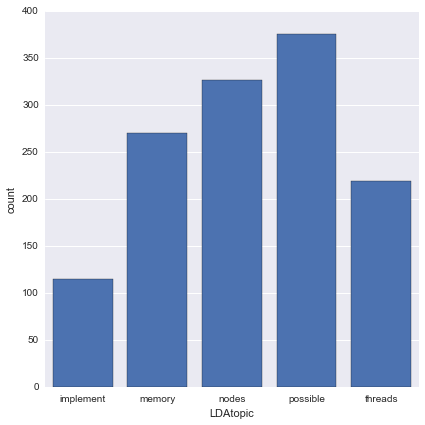

In [8]:
# histogram of LDA topics
sns.factorplot(utils.COL_LDA, data=data_topic, size=6)

## Help Seeking
I used an extremely naive set of rules to determine if a comment was a help request. , such as identifying if a question mark is included in the message (or the word 'question', or 'struggle' or 'stuck', etc) I identified which entries are most likely help requests and which are not. In the future, a coding scheme should be developed to determine what kinds of help are being sought.

In [35]:
# example code - do not execute
def is_help_topic(sentence):
    if "help" in sentence or "question" in sentence or "?" in sentence or "dunno" in sentence or "n't know" in sentence:
        return True
    if "confus" in sentence or "struggl" in sentence or "lost" in sentence or "stuck" in sentence or "know how" in sentence:
        return True
    return False

,isHelpSeeking
count,1305
mean,0.4291188
std,0.4951401
min,False
25%,0
50%,0
75%,1
max,True


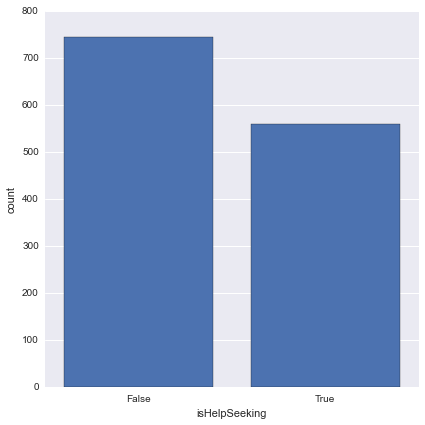

In [5]:
data_help = data[[utils.COL_HELP]]
# histogram of help requests
sns.factorplot(utils.COL_HELP, data=data_help, size=6)
data_help.describe()

## Conclusion
In conclusion, ...TODO: there's still more analysis to do...

---
## Documentation
Find this project in [Github: UberHowley/SPOC-File-Processing](https://github.com/UberHowley/spoc-file-processing)


